# ***Estimation of obesity levels based on eating habits and physical condition***

# Introduction

## Problem description

Obesity has more than doubled since 1980. In fact, hunger still blights many parts of the world, but the share of people who do not have enough to eat is in decline. Our society moved from traditional foods to high-calorie fast food and more sedentary lifestyle, which is driving to the rise of obesity even faster and faster. The more we do not pay attention to our meals and our physical activities, the more we risk of developing weight related diseases like diabetes or heart disease. Obesity is a global problem and is rapidly spreading from the rich world to the poor. But we have a chance to live as a normal weight person, if we find out in time, that we have a tendency to be obese, or if we already have such habits, that ruin our healthy life.

The aim of this project is to predict, which persons have higher probability of being obese and to estimate to which obesity level would be classified based on lifestyle habits, such as meals, sport activity, smoking, and even genetic traits.

## Dataset

The dataset presents data for the estimation of obesity levels in people from Mexico, Peru and Colombia, based on their eating habits and physical condition. The dataset was downloaded from [2].

The data.csv file contains the following information:

* **Gender** - person's gender
* **Age** - person's age in years
* **Height** - person's height in meter
* **Weight** - person's weight in kilogram
* **family_history_with_overweight** - specifies if the person has a family member who suffered/suffers from overweight or not
* **FAVC** - specifies if the person eats high caloric food frequently
* **FCVC** - specifies if the person eats vegetables usually in his meals
* **NCP** - specifies how many main meals has the person daily
* **CAEC** - specifies if the person eats any food between meals
* **SMOKE** - specifies if the person smokes or not
* **CH2O** - specifies how much water drinks the person daily in liter
* **SCC** - specifies if the person monitors the calories he eats daily or not
* **FAF** - specifies how often does the person physical activity in day/week
* **TUE** - specifies how much time uses the person technological devices, such as cell phone, videogames, television, computer and others in hours
* **CALC** - specifies how often drinks the person alcohol
* **MTRANS** - specifies which transportation method uses the person usually (Automobile, Motorbike, Bike, Public Transport, Walking)
* **NObeyesdad** - level of obesity

# Python setup

In [1]:
#import sys to provide information about constants, functions and methods
import sys
assert sys.version_info >= (3, 5)

# import sklearn for a lot of efficient tools for machine learning and statistical modeling
import sklearn
assert sklearn.__version__ >= "0.20"

#import numpy to perform mathematical operations on arrays
import numpy as np
np.random.seed(42)

#import os
import os

# import pandas for data storage and manipulation
import pandas as pd

# import matplotlib to plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#import seaborn to provide a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)

# Get data

Download and extract zip file

In [2]:
dataset_path = "dataset"
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00544/ObesityDataSet_raw_and_data_sinthetic%20(2).zip"
zip_path = os.path.join(dataset_path, "ObesityDataSet_raw_and_data_sinthetic.zip")

In [3]:
#from zipfile import ZipFile
#import urllib.request

# download data file
# if the directory does not exist, create one
#if not os.path.isdir(dataset_path):
#    os.makedirs(dataset_path)

#urllib.request.urlretrieve(dataset_url, zip_path)

# extract the files from zip
#ZipFile(zip_path, 'r').extractall(path=dataset_path)

# remove the zip file to keep just the csv file
#os.remove(zip_path)

Loading data

In [4]:
csv_path = os.path.join(dataset_path, "ObesityDataSet_raw_and_data_sinthetic.csv")

data = pd.read_csv(csv_path)

Rename column names

In [5]:
# create more understandable column label names
data = data.rename(columns={'family_history_with_overweight': 'Family_history_with_overweight', 'FAVC': 'Eating_high_caloric_food_frequently', 
                     'FCVC': 'Eating_vegetables', 'NCP': 'Number_of_daily_meals', 'CAEC': 'Eating_between_meals', 'SMOKE': 'Smoking', 
                     'CH2O': 'Drinking_water_daily_quantity', 'SCC': 'Monitoring_daily_calories', 'FAF': 'Physical_activity_frequency', 
                     'TUE': 'Use_of_technological_devices', 'CALC': 'Drinking_alcohol_frequency', 
                    'MTRANS': 'Often_used_transportation', 'NObeyesdad': 'Obesity_level'})

# Data inspection and visualisation

In [6]:
data.head(10)

,Gender,Age,Height,Weight,Family_history_with_overweight,Eating_high_caloric_food_frequently,Eating_vegetables,Number_of_daily_meals,Eating_between_meals,Smoking,Drinking_water_daily_quantity,Monitoring_daily_calories,Physical_activity_frequency,Use_of_technological_devices,Drinking_alcohol_frequency,Often_used_transportation,Obesity_level
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Gender                               2111 non-null   object 
 1   Age                                  2111 non-null   float64
 2   Height                               2111 non-null   float64
 3   Weight                               2111 non-null   float64
 4   Family_history_with_overweight       2111 non-null   object 
 5   Eating_high_caloric_food_frequently  2111 non-null   object 
 6   Eating_vegetables                    2111 non-null   float64
 7   Number_of_daily_meals                2111 non-null   float64
 8   Eating_between_meals                 2111 non-null   object 
 9   Smoking                              2111 non-null   object 
 10  Drinking_water_daily_quantity        2111 non-null   float64
 11  Monitoring_daily_calories     

In [8]:
# check the describtion of each column, such as mean, min, max, etc.
data.describe()

,Age,Height,Weight,Eating_vegetables,Number_of_daily_meals,Drinking_water_daily_quantity,Physical_activity_frequency,Use_of_technological_devices
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


**Observations:**
* *As we can see the average age of people who took this survey is 24 years. The youngest person is 14 years old, and the oldest one is 61 years old.*
* *The average weight of the people is 86 kilograms.*
* *The maximum liter of drinked water is 3 liters.*
* *Most of the people do physical activity very rare.*

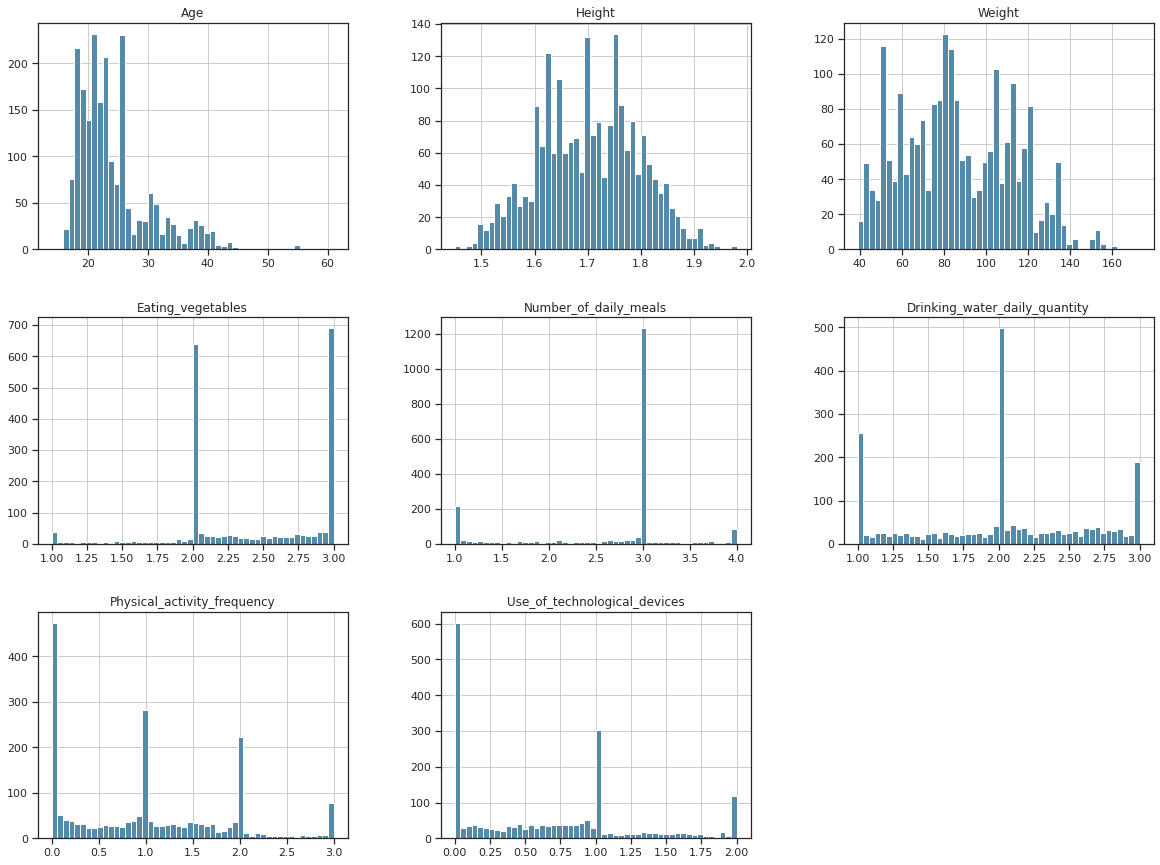

In [9]:
data.hist(bins=50, figsize=(20,15), color='#558AA9')
plt.show()

**Observations:**

*From these histograms we can conclude that most of the survey participants are young, between 19 and 27 years old. Related to height and weight, the dataset contains various values, but there are more people who are about 1.70 meters tall and people who are about 80 kilograms.*

*Furthermore, most of the participants eat 3 times and drink 2 liters of water per day. The physical activity frequency has in average a lower value, similarly to the use of technological devices.*

## Gender ratio

In [10]:
# analyze the survey participants by gender

genderCounts = data['Gender'].value_counts()

genderCountsN = data['Gender'].value_counts(normalize=True)

df = pd.DataFrame({'Count': genderCounts[:], 'Frequency': genderCountsN[:]})
df

,Count,Frequency
Male,1068,0.505921
Female,1043,0.494079


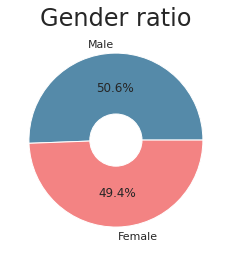

In [11]:
genders = ['Male', 'Female']
size = df['Count']

plt.title("Gender ratio", size=24)
plt.rcParams['figure.figsize'] = (5.0, 5.0)
my_circle = plt.Circle( (0,0), 0.3, color='white')
plt.pie(size, labels=genders, colors=['#558AA9', '#F38383'], autopct="%.1f%%")
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## Relation between gender, age and often used transportation method

<AxesSubplot:title={'center':'Often used transportation methods by genders and ages'}, xlabel='Gender', ylabel='Age'>

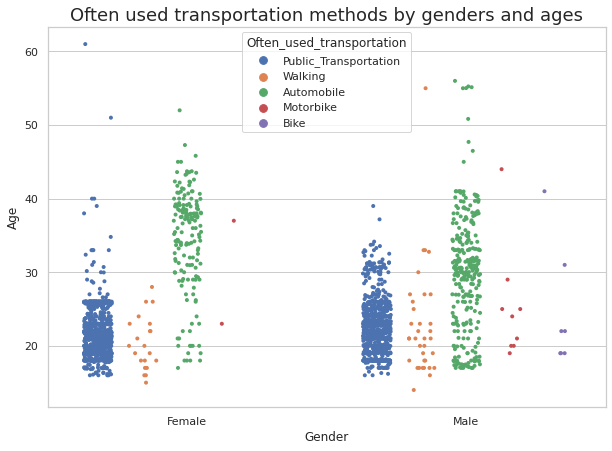

In [42]:
#analyze the often used transportation methods by gender and age

plt.title("Often used transportation methods by genders and ages", size=18)
plt.rcParams['figure.figsize'] = (10.0, 7.0)
sns.color_palette("Set2")
sns.set_style("whitegrid")
sns.stripplot(data=data, x='Gender', y='Age', hue='Often_used_transportation', jitter=0.25, dodge=True, size=4)

## Frequency of obesity levels

In [13]:
# analyze how many persons belong to each obesity level category

obesityLevelCounts = data['Obesity_level'].value_counts()

obesityLevelCountsN = data['Obesity_level'].value_counts(normalize=True)

df = pd.DataFrame({'Count': obesityLevelCounts[:], 'Frequency': obesityLevelCountsN[:]})
df

,Count,Frequency
Obesity_Type_I,351,0.166272
Obesity_Type_III,324,0.153482
Obesity_Type_II,297,0.140692
Overweight_Level_I,290,0.137376
Overweight_Level_II,290,0.137376
Normal_Weight,287,0.135955
Insufficient_Weight,272,0.128849


Text(0.5, 1.0, 'Number of individuals by obesity level')

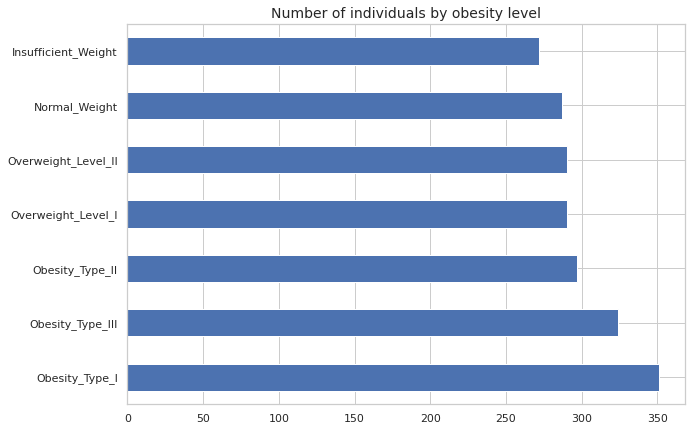

In [14]:
obesityLevelCounts.plot(kind="barh")
plt.title("Number of individuals by obesity level", size=14)

## Obesity level and physical activity

Text(0.5, 1.0, 'Obesity levels by physical activity')

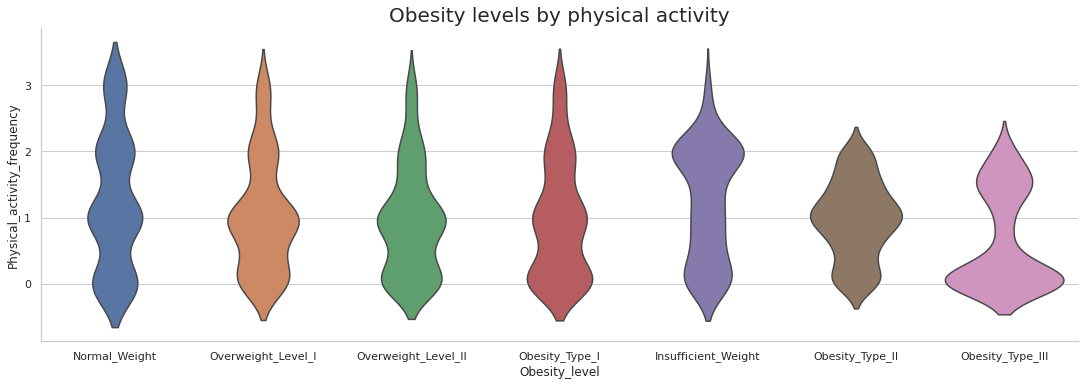

In [15]:
# analyze the relation between obesity level and physical activity

sns.catplot(x = 'Obesity_level', y = 'Physical_activity_frequency', data = data, kind = "violin", height = 5, aspect = 3, inner=None)
plt.title("Obesity levels by physical activity", size=20)

# Data preparation

## Transformation of categorical features

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# transformations
ordinal_cat_attribs = ["Obesity_level"]
onehot_cat_attribs = ["Gender", "Eating_between_meals", "Drinking_alcohol_frequency", "Often_used_transportation"]
yes_no_attribs = ["Family_history_with_overweight", "Eating_high_caloric_food_frequently", "Smoking", "Monitoring_daily_calories"]

data_prepared = pd.get_dummies(data, columns=onehot_cat_attribs)

for attr in ordinal_cat_attribs:
    data_prepared[attr] = data_prepared[attr].astype('category')
    data_prepared[attr] = data_prepared[attr].cat.codes

for attr in yes_no_attribs:
    data_prepared[attr] = data_prepared[attr].map({'yes': 1, 'no': 0})

In [17]:
data_prepared["Obesity_level"]

0       1
1       1
2       1
3       5
4       6
       ..
2106    4
2107    4
2108    4
2109    4
2110    4
Name: Obesity_level, Length: 2111, dtype: int8

In [18]:
data_prepared.head()

,Age,Height,Weight,Family_history_with_overweight,Eating_high_caloric_food_frequently,Eating_vegetables,Number_of_daily_meals,Smoking,Drinking_water_daily_quantity,Monitoring_daily_calories,...,Eating_between_meals_no,Drinking_alcohol_frequency_Always,Drinking_alcohol_frequency_Frequently,Drinking_alcohol_frequency_Sometimes,Drinking_alcohol_frequency_no,Often_used_transportation_Automobile,Often_used_transportation_Bike,Often_used_transportation_Motorbike,Often_used_transportation_Public_Transportation,Often_used_transportation_Walking
0,21.0,1.62,64.0,1,0,2.0,3.0,0,2.0,0,...,0,0,0,0,1,0,0,0,1,0
1,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,1,...,0,0,0,1,0,0,0,0,1,0
2,23.0,1.80,77.0,1,0,2.0,3.0,0,2.0,0,...,0,0,1,0,0,0,0,0,1,0
3,27.0,1.80,87.0,0,0,3.0,3.0,0,2.0,0,...,0,0,1,0,0,0,0,0,0,1
4,22.0,1.78,89.8,0,0,2.0,1.0,0,2.0,0,...,0,0,0,1,0,0,0,0,1,0


In [19]:
data_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 28 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Age                                              2111 non-null   float64
 1   Height                                           2111 non-null   float64
 2   Weight                                           2111 non-null   float64
 3   Family_history_with_overweight                   2111 non-null   int64  
 4   Eating_high_caloric_food_frequently              2111 non-null   int64  
 5   Eating_vegetables                                2111 non-null   float64
 6   Number_of_daily_meals                            2111 non-null   float64
 7   Smoking                                          2111 non-null   int64  
 8   Drinking_water_daily_quantity                    2111 non-null   float64
 9   Monitoring_daily_calories     

## Creating artificial features

In [20]:
# add Body_Mass_Index column to the data set

data_prepared['Body_Mass_Index'] = data_prepared['Weight'] / (data_prepared['Height'] * data_prepared['Height'])

In [21]:
data_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 29 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Age                                              2111 non-null   float64
 1   Height                                           2111 non-null   float64
 2   Weight                                           2111 non-null   float64
 3   Family_history_with_overweight                   2111 non-null   int64  
 4   Eating_high_caloric_food_frequently              2111 non-null   int64  
 5   Eating_vegetables                                2111 non-null   float64
 6   Number_of_daily_meals                            2111 non-null   float64
 7   Smoking                                          2111 non-null   int64  
 8   Drinking_water_daily_quantity                    2111 non-null   float64
 9   Monitoring_daily_calories     

## Splitting the dataset

In [22]:
# split the dataset to train and test datasets

from sklearn.model_selection import train_test_split

train, test = train_test_split(data_prepared, test_size=0.2, random_state=10)

In [23]:
print("train set length:", len(train))
print("test set length:", len(test))

train set length: 1688
test set length: 423


In [24]:
y_train = train['Obesity_level']
X_train = train.drop(['Obesity_level'], axis=1)
y_test = test['Obesity_level']
X_test = test.drop(['Obesity_level'], axis=1)

In [25]:
y_train

1907    4
1418    2
1911    4
1300    2
670     0
       ..
2009    4
1180    6
1344    2
527     0
1289    2
Name: Obesity_level, Length: 1688, dtype: int8

In [26]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 2054 to 471
Data columns (total 28 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Age                                              423 non-null    float64
 1   Height                                           423 non-null    float64
 2   Weight                                           423 non-null    float64
 3   Family_history_with_overweight                   423 non-null    int64  
 4   Eating_high_caloric_food_frequently              423 non-null    int64  
 5   Eating_vegetables                                423 non-null    float64
 6   Number_of_daily_meals                            423 non-null    float64
 7   Smoking                                          423 non-null    int64  
 8   Drinking_water_daily_quantity                    423 non-null    float64
 9   Monitoring_daily_calories    

## Correlation

In [27]:
# check the correlation between obesity level and other attributes

train.corr()["Obesity_level"].sort_values(ascending=False)

Obesity_level                                      1.000000
Body_Mass_Index                                    0.433827
Weight                                             0.392353
Eating_between_meals_Sometimes                     0.323530
Family_history_with_overweight                     0.311782
Age                                                0.240379
Drinking_water_daily_quantity                      0.115585
Drinking_alcohol_frequency_Sometimes               0.090285
Eating_between_meals_no                            0.078547
Eating_high_caloric_food_frequently                0.067814
Drinking_alcohol_frequency_Frequently              0.058196
Often_used_transportation_Automobile               0.057267
Height                                             0.047887
Eating_vegetables                                  0.039730
Gender_Male                                        0.024617
Often_used_transportation_Public_Transportation   -0.016912
Often_used_transportation_Motorbike     

array([[<AxesSubplot:xlabel='Obesity_level', ylabel='Obesity_level'>,
        <AxesSubplot:xlabel='Weight', ylabel='Obesity_level'>,
        <AxesSubplot:xlabel='Height', ylabel='Obesity_level'>,
        <AxesSubplot:xlabel='Body_Mass_Index', ylabel='Obesity_level'>],
       [<AxesSubplot:xlabel='Obesity_level', ylabel='Weight'>,
        <AxesSubplot:xlabel='Weight', ylabel='Weight'>,
        <AxesSubplot:xlabel='Height', ylabel='Weight'>,
        <AxesSubplot:xlabel='Body_Mass_Index', ylabel='Weight'>],
       [<AxesSubplot:xlabel='Obesity_level', ylabel='Height'>,
        <AxesSubplot:xlabel='Weight', ylabel='Height'>,
        <AxesSubplot:xlabel='Height', ylabel='Height'>,
        <AxesSubplot:xlabel='Body_Mass_Index', ylabel='Height'>],
       [<AxesSubplot:xlabel='Obesity_level', ylabel='Body_Mass_Index'>,
        <AxesSubplot:xlabel='Weight', ylabel='Body_Mass_Index'>,
        <AxesSubplot:xlabel='Height', ylabel='Body_Mass_Index'>,
        <AxesSubplot:xlabel='Body_Mass_Index', 

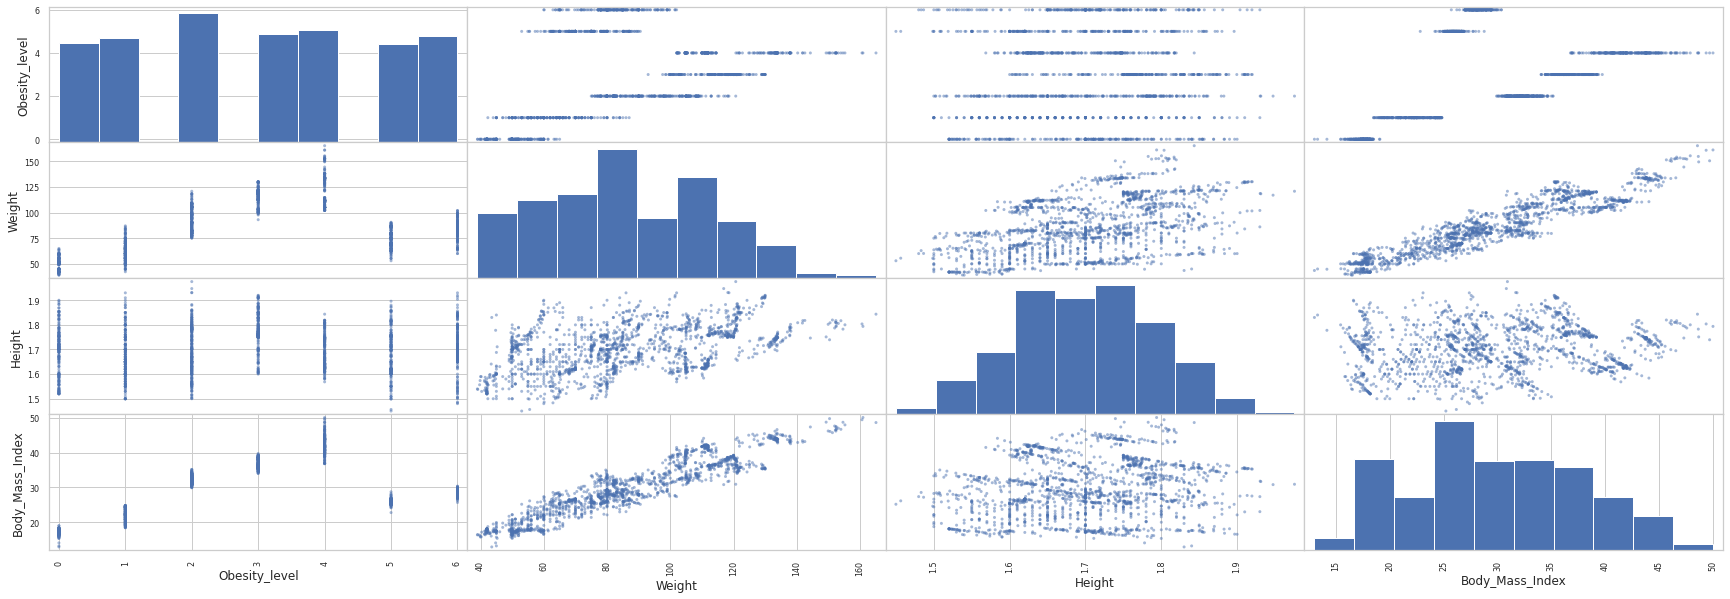

In [28]:
from pandas.plotting import scatter_matrix

attributes = ["Obesity_level", "Weight", "Height", "Body_Mass_Index"]
scatter_matrix(train[attributes], figsize=(30,10))

# Classification

## Evaluation function

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def eval(y_true, y_pred):
    return accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='macro'), recall_score(y_test, y_pred, average='macro')

## Plot functions

In [30]:
from sklearn.metrics import plot_confusion_matrix

def plot_confusion(clf):
    plot_confusion_matrix(clf, X_test, y_test)
    plt.grid(False)
    plt.show()

In [31]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

pca = PCA(n_components=2)
pca.fit(train)
X_Train_embedded = pca.transform(train)

def plot2DDecisionBoundary(clf, show=True):
    y_pred = clf.predict(X_train)

    # create meshgrid
    resolution = 100 # 100x100 background pixels
    X2d_xmin, X2d_xmax = np.min(X_Train_embedded[:,0]), np.max(X_Train_embedded[:,0])
    X2d_ymin, X2d_ymax = np.min(X_Train_embedded[:,1]), np.max(X_Train_embedded[:,1])
    xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

    # approximate Voronoi tesselation on resolution x resolution grid using 1-NN
    background_model = KNeighborsClassifier(n_neighbors=1).fit(X_Train_embedded, y_pred) 
    voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
    voronoiBackground = voronoiBackground.reshape((resolution, resolution))

    #plot
    plt.contourf(xx, yy, voronoiBackground)
    plt.scatter(X_Train_embedded[:,0], X_Train_embedded[:,1], c=y_train)
    if show:
        plt.show()

## Support Vector Classifier

In [32]:
from sklearn.svm import SVC

svc = SVC(random_state=10)

# train model
svc.fit(X_train, y_train)

# predict on test input set
y_pred = svc.predict(X_test)

# evaluate prediction
svc_accuracy, svc_precision, svc_recall = eval(y_test, y_pred)
print(svc_accuracy, svc_precision, svc_recall)

0.7257683215130024 0.7417061117532118 0.7269429892669328


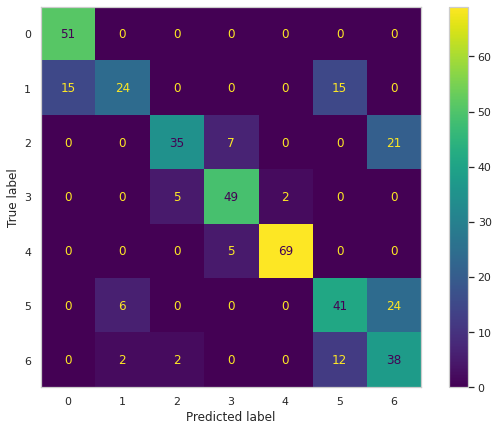

In [33]:
plot_confusion(svc)

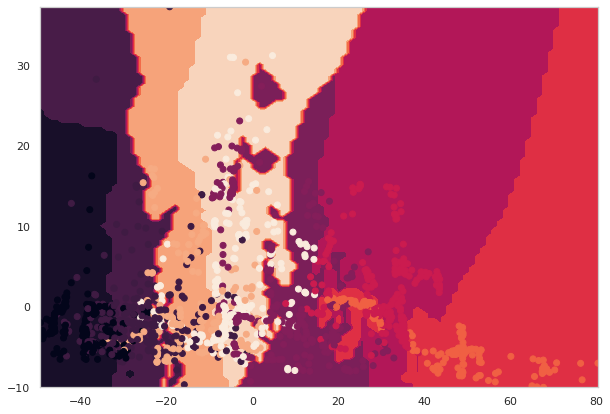

In [34]:
plot2DDecisionBoundary(svc)

## Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=-1, random_state=10)

# train model
rfc.fit(X_train, y_train)

# predict on test input set
y_pred = rfc.predict(X_test)

# evaluate prediction
rfc_accuracy, rfc_precision, rfc_recall = eval(y_test, y_pred)
print(rfc_accuracy, rfc_precision, rfc_recall)

0.9787234042553191 0.9788667448869324 0.9781723373272669


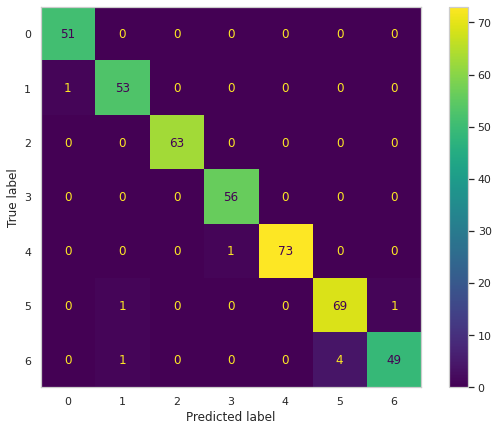

In [36]:
plot_confusion(rfc)

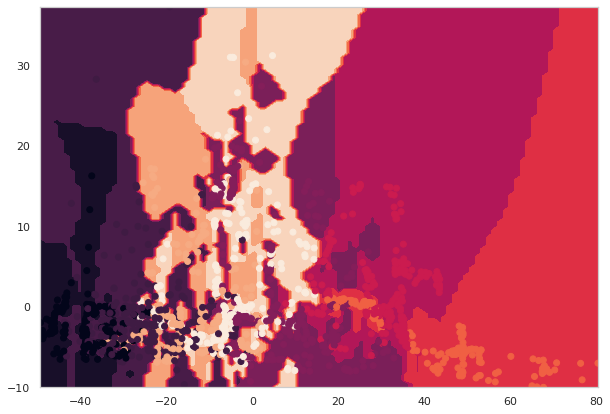

In [37]:
plot2DDecisionBoundary(rfc)

### Feature importances

The random forest algorithm returns the importance of each feature:

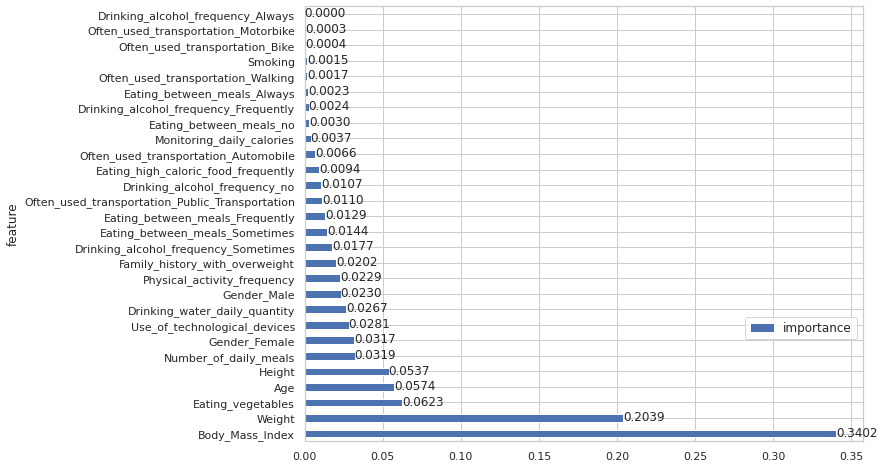

In [38]:
features = sorted(zip(X_train.columns, rfc.feature_importances_), key=lambda x: x[1], reverse=True)

df = pd.DataFrame(features,columns=["feature","importance"])
ax = df.plot(x='feature',y='importance',kind='barh',figsize=(10,8))

ax.legend(bbox_to_anchor=(1, 0.3), fontsize='12');
for p in ax.patches:
    w = p.get_width()
    ax.annotate(f'{w:.4f}', (w, p.get_y() + 0.1))

# Results

## Comparison of scores

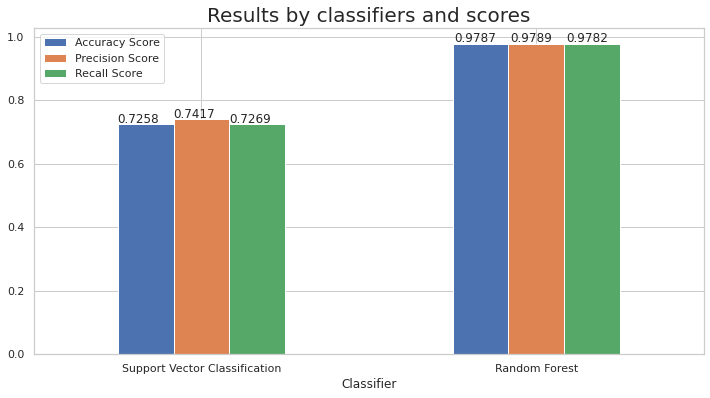

In [49]:
import pandas as pd

scores = [("Support Vector Classification", svc_accuracy, svc_precision, svc_recall), 
             ("Random Forest", rfc_accuracy, rfc_precision, rfc_recall)]

df = pd.DataFrame(scores, columns = ["Classifier","Accuracy Score", "Precision Score", "Recall Score"])
plot = df.plot(x = "Classifier", y = ["Accuracy Score", "Precision Score", "Recall Score"], 
        kind = 'bar',figsize = (12,6))
plt.title("Results by classifiers and scores", size=20)
plt.xticks(rotation=360)
for p in plot.patches:
    plot.annotate(str(round(p.get_height(), 4)),
                  (p.get_x() * 1.005, p.get_height() * 1.005))

*As it can be seen on the diagram, the Random Forest Classifier has higher scores than the Support Vector Classifier and the precision score is the best.*

## Confusion Matrices

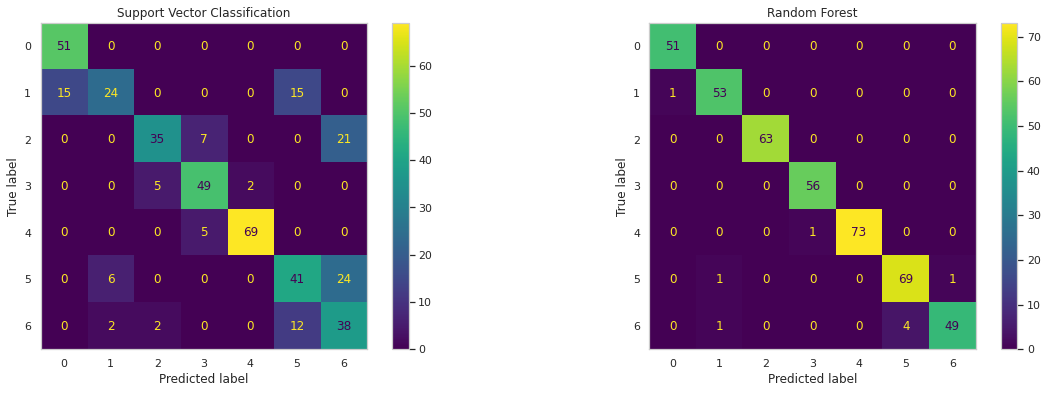

In [40]:
fig, axes = plt.subplots(1, 2, figsize = (20,6))
axes[0].grid(False)
axes[1].grid(False)
classifiers = [("Support Vector Classification", svc), ("Random Forest", rfc)]

for (name, cls), ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, X_test, y_test, ax = ax)
    ax.title.set_text(name)
plt.show()

*The confusion matrices show that indeed the Random Forest Classifier gives a better prediction. Almost all positive numbers are on the main diagonal of the matrix.*

## Decision boundaries

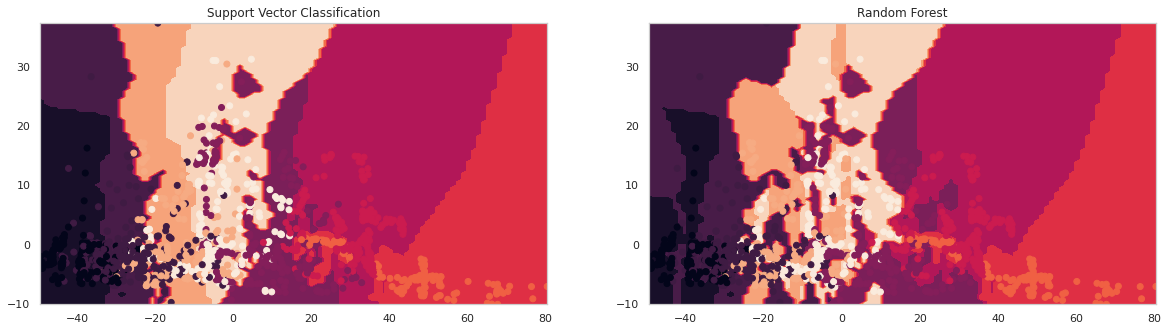

In [41]:
plt.figure(figsize=(20, 30))

classifiers = [("Support Vector Classification", svc), ("Random Forest", rfc)]

i = 1

for (name, cls), ax in zip(classifiers, axes.flatten()):
    plt.subplot(5, 2, i)
    plt.title(name)
    plot2DDecisionBoundary(cls, show=False)
    i = i + 1
plt.show()

# References

1. Fabio Mendoza Palechor, Alexis de la Hoz Manotas,
Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico,
Data in Brief,
Volume 25,
2019,
104344,
ISSN 2352-3409,
https://doi.org/10.1016/j.dib.2019.104344.
(https://www.sciencedirect.com/science/article/pii/S2352340919306985)
Abstract: This paper presents data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform. This data can be used to generate intelligent computational tools to identify the obesity level of an individual and to build recommender systems that monitor obesity levels. For discussion and more information of the dataset creation, please refer to the full-length article “Obesity Level Estimation Software based on Decision Trees” (De-La-Hoz-Correa et al., 2019).
Keywords: Obesity; Data mining; Weka; SMOTE

1. dataset: https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+

1. Aurelien Geron - Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow

1. scikit-learn.org, [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html.

1. scikit-learn.org, [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html.

1. Data Flair, [Online]. Available: https://data-flair.training/blogs/train-test-set-in-python-ml/.

1. scikit-learn.org, [Online]. Available: https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html.

1. scikit-learn.org, [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html?highlight=accuracy_score#sklearn.metrics.accuracy_score.

1. scikit-learn.org, [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html?highlight=precision%20score#sklearn.metrics.precision_score.

1. scikit-learn.org, [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html?highlight=recall%20score#sklearn.metrics.recall_score.